In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from gridworld import *
from gridrender import *
from utils import *
from homework1_toolbox import *

# Dynamic Programming

### Q1: Implementing the discrete MDP model

In [2]:
n_states = 3
n_actions = 3
proba_trans = np.zeros((n_states, n_actions, n_states))
reward = np.zeros((n_states, n_actions))
# Defining the reward
# State 1 rewards
reward[0, 0] = 0.
reward[0, 1] = 0.
reward[0, 2] = 5/100
# State 2 rewards
reward[1, 0] = 0.
reward[1, 1] = 0.
reward[1, 2] = 0.
# State 3 rewards
reward[2, 0] = 0.
reward[2, 1] = 1.
reward[2, 2] = 9/10
# Defining the transition probabilities
# State 1  as current state
proba_trans[0, 0, 0] = 0.55
proba_trans[0, 0, 1] = 0.45
proba_trans[0, 0, 2] = 0.
proba_trans[0, 1, 0] = 0.3
proba_trans[0, 1, 1] = 0.7
proba_trans[0, 1, 2] = 0.
proba_trans[0, 2, 0] = 1.
proba_trans[0, 2, 1] = 0.
proba_trans[0, 2, 2] = 0.
# State 2  as current state
proba_trans[1, 0, 0] = 1.
proba_trans[1, 0, 1] = 0.
proba_trans[1, 0, 2] = 0.
proba_trans[1, 1, 0] = 0.
proba_trans[1, 1, 1] = 0.4
proba_trans[1, 1, 2] = 0.6
proba_trans[1, 2, 0] = 0.
proba_trans[1, 2, 1] = 1.
proba_trans[1, 2, 2] = 0.
# State 3  as current state
proba_trans[2, 0, 0] = 0.
proba_trans[2, 0, 1] = 1.
proba_trans[2, 0, 2] = 0.
proba_trans[2, 1, 0] = 0.
proba_trans[2, 1, 1] = 0.6
proba_trans[2, 1, 2] = 0.4
proba_trans[2, 2, 0] = 0.
proba_trans[2, 2, 1] = 0.
proba_trans[2, 2, 2] = 1.

mdp = MDP(proba_trans, reward)

There are no rewards in state $s_1$, therefore we want to avoid being stuck in it. We have $r(s_2, a_2) = \frac{9}{10}$, which is a good reward, thus we want to get stuck in state $s_2$, thus we take:
$$
\begin{cases}
\pi^*(s_0) = a_1 \\
\pi^*(s_1) = a_1 \\
\pi^*(s_0) = a_2
\end{cases}
$$

### Q2 : Value iteration

We want a $0.01$-optimal policy, therefore we take $\frac{2\epsilon \gamma}{1 - \gamma} = 0.01$ where $\epsilon$ is the stopping criterion of the algorithm.

In [3]:
policy, value = mdp.value_iteration(epsilon = ((1 - 0.95)/(2*0.95))*10**(-2), max_iter = 200)
print(policy)

[1 1 2]


This is indeed our guess for the optimal policy.

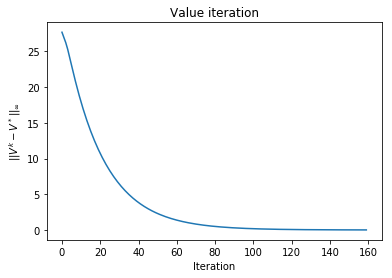

In [4]:
distances = np.linalg.norm(mdp.value_functions - value, axis = 1)
plt.plot(np.arange(mdp.it + 1), distances)
plt.xlabel("Iteration")
plt.ylabel(r"$||V^k - V^*||_{\infty}$")
plt.title("Value iteration")
plt.show()

### Q3 : Policy iteration

In [5]:
policy, value = mdp.policy_iteration(max_iter = 200)
print(policy)

[1 1 2]


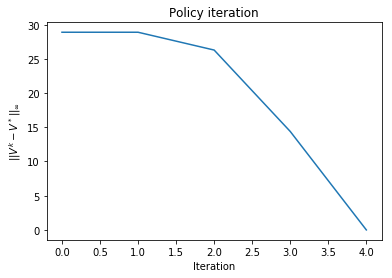

In [6]:
distances = np.linalg.norm(mdp.value_functions - value, axis = 1)
plt.plot(np.arange(mdp.it + 1), distances)
plt.xlabel("Iteration")
plt.ylabel(r"$||V^k - V^*||_{\infty}$")
plt.title("Policy iteration")
plt.show()

Timing value iteration and computing the number of iterations it takes until convergence.

In [7]:
%timeit mdp.value_iteration(epsilon = ((1 - 0.95)/(2*0.95))*10**(-2), max_iter = 200)

6.24 ms ± 942 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
print("number of iterations taken by value iteration : ", mdp.it)

number of iterations taken by value iteration :  160


Timing policy iteration and computing the number of iterations it takes until convergence.

In [9]:
%timeit mdp.policy_iteration(max_iter = 200)

342 µs ± 67.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
print("number of iterations taken by policy iteration : ", mdp.it)

number of iterations taken by policy iteration :  4


In this example, policy iteration is much faster to converge than value iteration and it takes much less iterations.
The problem with policy iteration is that it requires a full policy evaltion in each step, thus if the state space is huge this step becomes expensive and value iteration may become the preferable option.

# Reinforcement Learning

### Q4 : Policy evaluation

In [11]:
rl = RL(GridWorld1)
mu_0 = rl.estimate_initial_distribution(n_samples = 100000) # Estimate the starting state distribution.

In [12]:
# We define the deterministic policy where we choose right when available and up otherwise.

policy = np.zeros((GridWorld1.n_states, len(GridWorld1.action_names)))
for state in range(GridWorld1.n_states):
    if 0 in GridWorld1.state_actions[state]:
        policy[state, 0] = 1

    else:
        policy[state, 3] = 1


We take $T_{max} = 140$ to get an approximation of aroun $10^{-3}$ and for each state we simulate 1000 trajectories to estimate the optimal value function.

In [13]:
# Estimating value function with Monte Carlo approximation using 1000 trajectories for each state.
rl.value_monte_carlo_vectorized(policy, range(11), n_trajectories = 1000, max_iter = 140)

array([ 0.87423702,  0.92786264,  0.98778725,  0.        ,  0.65303792,
       -0.9948725 ,  0.        , -0.82917081, -0.8772077 , -0.93306313,
       -0.99466987])

In [14]:
value_function_true = np.array([0.87691855, 0.92820033, 0.98817903, 0.00000000, 0.67106071, -0.99447514, 0.00000000, -0.82847001, -0.87691855,
        -0.93358351, -0.99447514])
J = np.dot(mu_0, value_function_true)

In [27]:
J_estimates = []
n = 10000
value_function_n = np.zeros((rl.gridworld.n_states, n)) # Where we store Monte-Carlo run on a trajectory in each iteration.
value_function_k = np.zeros(rl.gridworld.n_states) # Where we store Vk(s).
visited_states = set([])
for k in range(1, n):
    state = rl.gridworld.reset()
    # Avoid terminal states.
    while (state == 3) or (state == 6):
        state = rl.gridworld.reset()
        
    visited_states.add(state)
    value_function_n[state, k] = rl.value_monte_carlo(policy, state, n_trajectories = 1, max_iter = 140)
    if (k % 10 == 0) and (k > 10):
        value_function_k[list(visited_states)] = value_function_n[list(visited_states), :k + 1].sum(axis = 1)/(value_function_n[list(visited_states), :k + 1] != 0).sum(axis = 1)
        J_estimates.append(np.dot(mu_0, value_function_k))

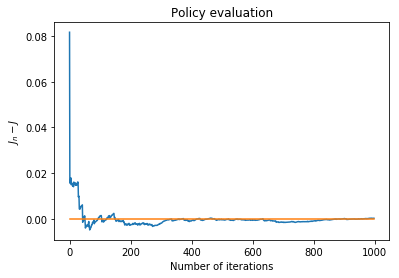

In [28]:
plt.plot(range(len(J_estimates)), J_estimates - J)
plt.plot(range(len(J_estimates)), np.zeros(len(J_estimates)))
plt.xlabel("Number of iterations")
plt.ylabel(r"$J_{n} - J$")
plt.title("Policy evaluation")
plt.show()

### Q5 : Policy optimization

Assume we have some state-action function $Q_t(x, a)$, and we are in the current state $x_t \in \mathcal{X}$. We choose the next state $x_{t + 1}$ according to an $\epsilon$-greedy policy, that is we choose $a_t = argmax_{a \in \mathcal{A}}Q_t(x_t, a)$ with probability $1 - \epsilon$ otherwise we choose an action from the rest with a uniform distribution. Now that we have simulated the transition $(x_t, a_t, r_t, x_{t + 1})$, we can compute the temporal difference:
\begin{equation}
\delta_t = r_t + \gamma.max_{a \in \mathcal{A}}\left(Q_t\left(x_{t + 1}, a \right) \right) - Q_t\left(x_t, a_t \right)
\end{equation}
Then we can update the estimate:
\begin{equation}
Q_{t + 1}\left(x_t, a_t \right) = Q_{t}\left(x_t, a_t \right) + \alpha_{N\left(x_t, a_t \right)}\delta_t
\end{equation}
Where $N\left(x_t, a_t \right)$ is the number of times we visited state-action $\left(x_t, a_t \right)$, by taking $\alpha_n = \frac{1}{n}$, the learining rate satisfies Robbins-Monro conditions:
$$
\begin{cases}
\sum_{n}\alpha_n = \infty \\
\sum_{n}\alpha_n^2 < \infty
\end{cases}
$$
but in order for the $Q$-learning algorithm to converge, all states-actions must be visited infinitly often. This is relying on the quality of the exploratory policy. In this case, a good choice of $\epsilon$.

Note: We may need to decrease $\epsilon$ to 0 over time with a cooling schedule like SARSA algorithm does with its exploratory policy.


In [29]:
rl = RL(GridWorld1)
greedy_policy, V_episodes, cumulated_rewards = rl.q_learning(epsilon = 0.3, episodes = 5000, max_iter = 140, decay = 0.8, cooling = True)

In [30]:
gui.render_policy(GridWorld1, greedy_policy)

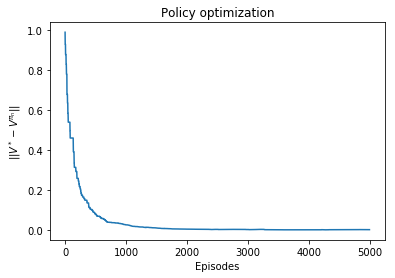

In [31]:
v_opt = [0.87691855, 0.92820033, 0.98817903, 0.00000000, 0.82369294, 0.92820033, 0.00000000, 0.77818504, 0.82369294,
         0.87691855, 0.82847001]
plt.plot(range(len(V_episodes)), np.linalg.norm(np.array(V_episodes) - np.array(v_opt), np.inf, axis = 1))
plt.xlabel("Episodes")
plt.ylabel(r"$||V^* - V^{\pi_n}||$")
plt.title("Policy optimization")
plt.show()

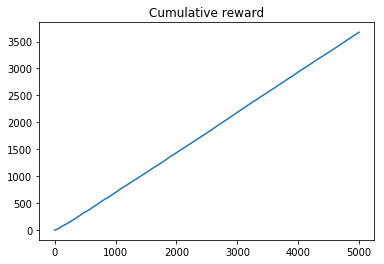

In [32]:
plt.plot(range(len(V_episodes)), cumulated_rewards)
plt.title("Cumulative reward")
plt.show()

### Q6 : 

The initial distribution $\mu_0$ does influence the estimation of the optimal policy.

- If $\mu_0$ always gives an absorbant state, no trajectories will be produced and thus Robbins-Monro condition of visiting each state-action infinitely often does not hold.
- If the MDP simulator is deterministic with respect to some state-action, if $m_0$ is poorly chosen, there is a risk of not exploring all the states. There will be a need for a very good exploratory policy, therefore $m_0$ does influence the estimation of the optimal policy.